<a href="https://colab.research.google.com/github/monika-modzelewsk/Malaga-airbnb/blob/main/Malaga_Monika_Modzelewska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import and preliminary analysis of source data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv("http://data.insideairbnb.com/spain/andaluc%C3%ADa/malaga/2023-12-31/data/listings.csv.gz")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7783 entries, 0 to 7782
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7783 non-null   int64  
 1   listing_url                                   7783 non-null   object 
 2   scrape_id                                     7783 non-null   int64  
 3   last_scraped                                  7783 non-null   object 
 4   source                                        7783 non-null   object 
 5   name                                          7783 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         3763 non-null   object 
 8   picture_url                                   7783 non-null   object 
 9   host_id                                       7783 non-null   i

In [ ]:
pd.set_option('display.max_columns', None)
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,96033,https://www.airbnb.com/rooms/96033,20231231043937,2023-12-31,city scrape,Rental unit in Málaga · ★4.62 · 2 bedrooms · 2 beds · 1 bath,NaN,"A 200 metros de las playas de El Palo, antiguo barrio de pescadores de Málaga. Frente al superme...",https://a0.muscache.com/pictures/32780788/e4875fbd_original.jpg,510467,https://www.airbnb.com/users/show/510467,Rafael,2011-04-15,"Andalusia, Spain",¡Hola! Gracias por acercarte a nosotros y encantados de saludarte. \r\nNos encanta hacer que la ...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/59fb2234-e2de-4ba7-9d07-5181a979a8a3.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/59fb2234-e2de-4ba7-9d07-5181a979a8a3.jpg?aki_policy=pro...,NaN,1,1,"['email', 'phone', 'work_email']",t,t,"Málaga, Andalusia, Spain",Este,NaN,36.720310,-4.356270,Entire rental unit,Entire home/apt,3,NaN,1 bath,NaN,2.0,[],$53.00,3,180,3,3,1125,1125,3.0,1125.0,NaN,t,12,18,30,260,2023-12-31,206,43,3,2013-10-18,2023-12-17,4.62,4.71,4.62,4.87,4.92,4.40,4.60,VFT/MA/22043,f,1,1,0,0,1.66
1,166473,https://www.airbnb.com/rooms/166473,20231231043937,2023-12-31,city scrape,Rental unit in Málaga · ★4.73 · 1 bedroom · 4 beds · 2 shared baths,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-166473/original/61bc9e44-c8e4-4dec-a922-7df40db572...,793360,https://www.airbnb.com/users/show/793360,Fred,2011-07-08,"El Faro, Spain","Hi All, my name is Fred and I am half Swedish and half English but live here in Spain full time....",within a few hours,100%,78%,t,https://a0.muscache.com/im/pictures/user/f2d8a5e9-6448-46a5-ab98-3a3044ee3a12.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/f2d8a5e9-6448-46a5-ab98-3a3044ee3a12.jpg?aki_policy=pro...,NaN,4,4,"['email', 'phone']",t,t,NaN,Este,NaN,36.720310,-4.361080,Private room in rental unit,Private room,1,NaN,2 shared baths,NaN,4.0,[],$19.00,5,365,5,5,365,365,5.0,365.0,NaN,t,0,0,0,189,2023-12-31,94,6,0,2011-08-25,2023-11-04,4.73,4.61,4.48,4.82,4.91,4.81,4.70,NaN,f,4,0,4,0,0.63
2,212845,https://www.airbnb.com/rooms/212845,20231231043937,2023-12-31,city scrape,Rental unit in Málaga · ★4.81 · 1 bedroom · 2 beds · 1.5 shared baths,NaN,NaN,https://a0.muscache.com/pictures/d4a19330-03c4-42fa-9cac-35b5a4715eb2.jpg,617998,https://www.airbnb.com/users/show/617998,Valle,2011-05-23,"Málaga, Spain","Soy mujer de 66 años activa y viajera. Tengo dos perritas, me gusta mucho leer, la música y sali...",within a few hours,100%,94%,f,https://a0.muscache.com/im/pictures/user/User-617998/original/71e1f8f2-eaa6-48a8-8ec2-8f3e17ae02...,https://a0.muscache.com/im/pictures/user/User-617998/original/71e1f8f2-eaa6-48a8-8ec2-8f3e17ae02...,NaN,3,3,"['email', 'pho

# 2. Data editing

In [ ]:
df['id'].unique().size

7783

In [ ]:
df.set_index('id', inplace=True)

In [ ]:
df_isna = df.isna().sum() > 0
df.loc[:, df_isna].isna().sum().sort_values(ascending=False) / len(df) * 100

description                     100.000000
bedrooms                        100.000000
calendar_updated                100.000000
neighbourhood_group_cleansed    100.000000
bathrooms                       100.000000
host_neighbourhood               90.607735
neighborhood_overview            51.651034
neighbourhood                    51.651034
host_about                       42.233072
host_location                    22.896056
last_review                      11.910574
first_review                     11.910574
reviews_per_month                11.910574
review_scores_rating             11.897726
review_scores_accuracy           11.897726
review_scores_cleanliness        11.897726
review_scores_checkin            11.897726
review_scores_communication      11.897726
review_scores_location           11.897726
review_scores_value              11.897726
host_response_rate                8.030322
host_response_time                8.030322
host_acceptance_rate              4.240010
license    

In [ ]:
df.drop(columns=['calendar_updated', 'description', 'neighbourhood_group_cleansed', 'host_neighbourhood', 'host_about', 'neighbourhood', 'neighborhood_overview'],
                 inplace=True)

In [ ]:
df.describe()

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.783000e+03,7.783000e+03,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,0.0,0.0,7697.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.00000,7783.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,7783.000000,7783.000000,7783.000000,7783.000000,6856.000000
mean,2.023123e+13,1.869491e+08,39.144032,56.219967,36.720264,-4.421272,4.065784,NaN,NaN,2.596986,3.018116,567.734164,2.942567,5.332391,669.250032,770.128999,3.936683,709.850186,13.535269,29.692920,48.022485,201.382115,42.909546,13.55467,0.808686,4.627866,4.695396,4.656130,4.742419,4.765037,4.704725,4.560159,21.069639,19.578055,1.479892,0.010150,1.469093
std,0.000000e+00,1.689522e+08,95.935758,150.867687,0.013649,0.025612,2.184038,NaN,NaN,2.009782,11.700123,448.480273,11.194407,14.803481,478.255792,436.328425,12.168407,447.828868,10.626737,20.986007,30.924476,124.168587,71.536994,18.57886,1.459121,0.436841,0.397141,0.427981,0.385597,0.374413,0.370181,0.456394,35.019659,34.655770,4.549658,0.191773,1.507250
min,2.023123e+13,4.555300e+04,1.000000,1.000000,36.646012,-4.585205,1.000000,NaN,NaN,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.023123e+13,4.057036e+07,2.000000,2.000000,36.718160,-4.429246,2.000000,NaN,NaN,1.000000,1.000000,150.000000,1.000000,2.000000,100.000000,365.000000,2.000000,365.000000,3.000000,10.000000,21.000000,85.000000,3.000000,1.00000,0.000000,4.500000,4.610000,4.540000,4.670000,4.710000,4.600000,4.460000,1.000000,1.000000,0.000000,0.000000,0.390000
50%,2.023123e+13,1.264297e+08,7.000000,8.000000,36.722180,-4.422489,4.000000,NaN,NaN,2.000000,2.000000,365.000000,2.000000,3.000000,999.000000,1125.000000,2.800000,999.000000,13.000000,30.000000,52.000000,221.000000,15.000000,6.00000,0.000000,4.740000,4.800000,4.780000,4.850000,4.880000,4.800000,4.670000,5.000000,3.000000,0.000000,0.000000,0.990000
75%,2.023123e+13,3.170652e+08,45.000000,53.000000,36.725181,-4.417560,5.000000,NaN,NaN,3.000000,3.000000,1125.000000,3.000000,5.000000,1125.000000,1125.000000,3.900000,1125.000000,24.000000,50.000000,77.000000,320.000000,50.000000,19.00000,1.000000,4.900000,4.930000,4.930000,4.960000,4.990000,4.940000,4.820000,24.000000,21.000000,0.000000,0.000000,2.040000
max,2.023123e+13,5.530482e+08,1198.000000,2510.000000,36.875440,-4.278520,16.000000,NaN,NaN,50.000000,500.000000,1125.000000,500.000000,500.000000,1125.000000,1125.000000,500.000000,1125.000000,30.000000,60.000000,90.000000,365.000000,823.000000,174.00000,16.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,181.000000,181.000000,32.000000,6.000000,13.790000


In [ ]:
df_isna = df.isna().sum() > 0
df.loc[:, df_isna].isna().sum().sort_values(ascending=False) / len(df) * 100

bathrooms                      100.000000
bedrooms                       100.000000
host_location                   22.896056
last_review                     11.910574
first_review                    11.910574
reviews_per_month               11.910574
review_scores_rating            11.897726
review_scores_accuracy          11.897726
review_scores_cleanliness       11.897726
review_scores_checkin           11.897726
review_scores_communication     11.897726
review_scores_location          11.897726
review_scores_value             11.897726
host_response_time               8.030322
host_response_rate               8.030322
host_acceptance_rate             4.240010
license                          1.734550
beds                             1.104972
price                            0.822305
has_availability                 0.822305
host_is_superhost                0.449698
dtype: float64

In [ ]:
df['scrape_id'].unique()

array([20231231043937])

In [ ]:
df.drop(columns='scrape_id', inplace=True)

In [ ]:
for col in ['last_scraped', 'calendar_last_scraped', 'first_review', 'last_review']:
  df[col] = pd.to_datetime(df[col])

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7783 entries, 96033 to 1057114997047818035
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   7783 non-null   object        
 1   last_scraped                                  7783 non-null   datetime64[ns]
 2   source                                        7783 non-null   object        
 3   name                                          7783 non-null   object        
 4   picture_url                                   7783 non-null   object        
 5   host_id                                       7783 non-null   int64         
 6   host_url                                      7783 non-null   object        
 7   host_name                                     7783 non-null   object        
 8   host_since                                    778

In [ ]:
df['host_is_superhost'].unique()

array(['f', 't', nan], dtype=object)

In [ ]:
for col in ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']:
  df[col] = df[col].map({'t': True, 'f': False}).fillna(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7783 entries, 96033 to 1057114997047818035
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   7783 non-null   object        
 1   last_scraped                                  7783 non-null   datetime64[ns]
 2   source                                        7783 non-null   object        
 3   name                                          7783 non-null   object        
 4   picture_url                                   7783 non-null   object        
 5   host_id                                       7783 non-null   int64         
 6   host_url                                      7783 non-null   object        
 7   host_name                                     7783 non-null   object        
 8   host_since                                    778

In [ ]:
df['price'].unique()

array(['$53.00', '$19.00', '$43.00', '$44.00', '$61.00', '$93.00',
       '$86.00', '$81.00', '$45.00', '$71.00', '$68.00', '$49.00',
       '$51.00', '$79.00', '$192.00', '$141.00', '$55.00', '$92.00',
       '$73.00', '$30.00', '$80.00', '$65.00', '$77.00', '$95.00',
       '$58.00', '$99.00', '$110.00', '$101.00', '$180.00', '$162.00',
       '$59.00', '$150.00', '$116.00', '$90.00', '$28.00', '$176.00',
       '$154.00', '$170.00', '$33.00', '$31.00', '$307.00', '$121.00',
       '$500.00', '$66.00', '$108.00', '$264.00', '$270.00', '$40.00',
       '$37.00', '$211.00', '$78.00', '$83.00', '$112.00', '$117.00',
       '$172.00', '$75.00', '$232.00', '$196.00', '$130.00', '$50.00',
       '$265.00', '$91.00', '$39.00', '$94.00', '$70.00', '$189.00',
       '$132.00', '$100.00', '$67.00', '$262.00', '$133.00', '$85.00',
       '$260.00', '$54.00', '$96.00', '$184.00', '$69.00', '$225.00',
       '$20.00', '$114.00', '$113.00', '$175.00', '$518.00', '$97.00',
       '$104.00', '$106.0

In [ ]:
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype('float')
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=False).astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '', regex=False).astype('float') / 100.0

In [ ]:
df.head()

,listing_url,last_scraped,source,name,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96033,https://www.airbnb.com/rooms/96033,2023-12-31,city scrape,Rental unit in Málaga · ★4.62 · 2 bedrooms · 2 beds · 1 bath,https://a0.muscache.com/pictures/32780788/e4875fbd_original.jpg,510467,https://www.airbnb.com/users/show/510467,Rafael,2011-04-15,"Andalusia, Spain",within an hour,1.0,1.00,False,https://a0.muscache.com/im/pictures/user/59fb2234-e2de-4ba7-9d07-5181a979a8a3.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/59fb2234-e2de-4ba7-9d07-5181a979a8a3.jpg?aki_policy=pro...,1,1,"['email', 'phone', 'work_email']",True,True,Este,36.720310,-4.356270,Entire rental unit,Entire home/apt,3,NaN,1 bath,NaN,2.0,[],53.0,3,180,3,3,1125,1125,3.0,1125.0,True,12,18,30,260,2023-12-31,206,43,3,2013-10-18,2023-12-17,4.62,4.71,4.62,4.87,4.92,4.40,4.60,VFT/MA/22043,False,1,1,0,0,1.66
166473,https://www.airbnb.com/rooms/166473,2023-12-31,city scrape,Rental unit in Málaga · ★4.73 · 1 bedroom · 4 beds · 2 shared baths,https://a0.muscache.com/pictures/miso/Hosting-166473/original/61bc9e44-c8e4-4dec-a922-7df40db572...,793360,https://www.airbnb.com/users/show/793360,Fred,2011-07-08,"El Faro, Spain",within a few hours,1.0,0.78,True,https://a0.muscache.com/im/pictures/user/f2d8a5e9-6448-46a5-ab98-3a3044ee3a12.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/f2d8a5e9-6448-46a5-ab98-3a3044ee3a12.jpg?aki_policy=pro...,4,4,"['email', 'phone']",True,True,Este,36.720310,-4.361080,Private room in rental unit,Private room,1,NaN,2 shared baths,NaN,4.0,[],19.0,5,365,5,5,365,365,5.0,365.0,True,0,0,0,189,2023-12-31,94,6,0,2011-08-25,2023-11-04,4.73,4.61,4.48,4.82,4.91,4.81,4.70,NaN,False,4,0,4,0,0.63
212845,https://www.airbnb.com/rooms/212845,2023-12-31,city scrape,Rental unit in Málaga · ★4.81 · 1 bedroom · 2 beds · 1.5 shared baths,https://a0.muscache.com/pictures/d4a19330-03c4-42fa-9cac-35b5a4715eb2.jpg,617998,https://www.airbnb.com/users/show/617998,Valle,2011-05-23,"Málaga, Spain",within a few hours,1.0,0.94,False,https://a0.muscache.com/im/pictures/user/User-617998/original/71e1f8f2-eaa6-48a8-8ec2-8f3e17ae02...,https://a0.muscache.com/im/pictures/user/User-617998/original/71e1f8f2-eaa6-48a8-8ec2-8f3e17ae02...,3,3,"['email', 'phone']",True,True,Este,36.726070,-4.363830,Shared room in rental unit,Shared room,1,NaN,1.5 shared baths,NaN,2.0,[],43.0,2,90,2,2,90,90,2.0,90.0,True,0,0,0,0,2023-12-31,43,3,0,2012-02-17,2023-06-24,4.81,4.79,4.81,4.93,4.88,4.57,4.76,VFT/MA/09354,False,2,0,1,1,0.30
330760,https://www.airbnb.com/rooms/330760,2023-12-31,city scrape,Townhouse in Málaga · ★4.50 · 1 bedroom · 1 bed · 1.5 shared baths,https://a0.muscache.com/pictures/85419390/38a9bc0a_original.jpg,1687526,https://www.airbnb.com/users/show/1687526,Mayte,2012-02-02,Spain,within an hour,1.0,0.99,False,https://a

In [ ]:
def ColumnReport(checked_column):
  print('badana kolumna:              ', checked_column)
  print('typ danych:                  ', df[checked_column].dtype)
  print('ilość NaN:                   ', (df[checked_column].isna().sum()))
  print('procent NaN:                 ', df[checked_column].isna().sum() / len(df[checked_column]) * 100, '%')
  print('liczba wartości unikalnych:  ', len(df[checked_column].unique()))
  print('procent wartości unikalnych: ', len(df[checked_column].unique()) / len(df[checked_column]) * 100, '%')
  print()
  print('losowo wybrane obserwacje:')
  print()
  print(df[checked_column].sample(3).values)

In [ ]:
ColumnReport('name')

badana kolumna:               name
typ danych:                   object
ilość NaN:                    0
procent NaN:                  0.0 %
liczba wartości unikalnych:   3624
procent wartości unikalnych:  46.56302197096235 %

losowo wybrane obserwacje:

['Rental unit in Málaga · 4 bedrooms · 7 beds · 2 baths'
 'Rental unit in Málaga · 1 bedroom · 2 beds · 1 bath'
 'Rental unit in Málaga · ★4.65 · 2 bedrooms · 2 beds · 2 baths']


In [ ]:
df['host_verifications'].unique()

array(["['email', 'phone', 'work_email']", "['email', 'phone']",
       "['phone']", "['phone', 'work_email']",
       "['email', 'phone', 'photographer']", "['email']", '[]'],
      dtype=object)

In [ ]:
df['host_verifications'].apply(eval)

id
96033                  [email, phone, work_email]
166473                             [email, phone]
212845                             [email, phone]
330760                             [email, phone]
340024                             [email, phone]
                                  ...            
1056483550298006670                [email, phone]
1056634780623178557    [email, phone, work_email]
1056663927854621164    [email, phone, work_email]
1056694008736627484                [email, phone]
1057114997047818035                       [phone]
Name: host_verifications, Length: 7783, dtype: object

In [ ]:
df['host_verifications'].str.replace(r"[[\],']", '', regex=True).str.split()

id
96033                  [email, phone, work_email]
166473                             [email, phone]
212845                             [email, phone]
330760                             [email, phone]
340024                             [email, phone]
                                  ...            
1056483550298006670                [email, phone]
1056634780623178557    [email, phone, work_email]
1056663927854621164    [email, phone, work_email]
1056694008736627484                [email, phone]
1057114997047818035                       [phone]
Name: host_verifications, Length: 7783, dtype: object

In [ ]:
df['host_verifications'] = df['host_verifications'].apply(eval)

In [ ]:
df['host_verifications'].apply(tuple).unique()

array([('email', 'phone', 'work_email'), ('email', 'phone'), ('phone',),
       ('phone', 'work_email'), ('email', 'phone', 'photographer'),
       ('email',), ()], dtype=object)

In [ ]:
df.head()

,listing_url,last_scraped,source,name,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96033,https://www.airbnb.com/rooms/96033,2023-12-31,city scrape,Rental unit in Málaga · ★4.62 · 2 bedrooms · 2 beds · 1 bath,https://a0.muscache.com/pictures/32780788/e4875fbd_original.jpg,510467,https://www.airbnb.com/users/show/510467,Rafael,2011-04-15,"Andalusia, Spain",within an hour,1.0,1.00,False,https://a0.muscache.com/im/pictures/user/59fb2234-e2de-4ba7-9d07-5181a979a8a3.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/59fb2234-e2de-4ba7-9d07-5181a979a8a3.jpg?aki_policy=pro...,1,1,"[email, phone, work_email]",True,True,Este,36.720310,-4.356270,Entire rental unit,Entire home/apt,3,NaN,1 bath,NaN,2.0,[],53.0,3,180,3,3,1125,1125,3.0,1125.0,True,12,18,30,260,2023-12-31,206,43,3,2013-10-18,2023-12-17,4.62,4.71,4.62,4.87,4.92,4.40,4.60,VFT/MA/22043,False,1,1,0,0,1.66
166473,https://www.airbnb.com/rooms/166473,2023-12-31,city scrape,Rental unit in Málaga · ★4.73 · 1 bedroom · 4 beds · 2 shared baths,https://a0.muscache.com/pictures/miso/Hosting-166473/original/61bc9e44-c8e4-4dec-a922-7df40db572...,793360,https://www.airbnb.com/users/show/793360,Fred,2011-07-08,"El Faro, Spain",within a few hours,1.0,0.78,True,https://a0.muscache.com/im/pictures/user/f2d8a5e9-6448-46a5-ab98-3a3044ee3a12.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/f2d8a5e9-6448-46a5-ab98-3a3044ee3a12.jpg?aki_policy=pro...,4,4,"[email, phone]",True,True,Este,36.720310,-4.361080,Private room in rental unit,Private room,1,NaN,2 shared baths,NaN,4.0,[],19.0,5,365,5,5,365,365,5.0,365.0,True,0,0,0,189,2023-12-31,94,6,0,2011-08-25,2023-11-04,4.73,4.61,4.48,4.82,4.91,4.81,4.70,NaN,False,4,0,4,0,0.63
212845,https://www.airbnb.com/rooms/212845,2023-12-31,city scrape,Rental unit in Málaga · ★4.81 · 1 bedroom · 2 beds · 1.5 shared baths,https://a0.muscache.com/pictures/d4a19330-03c4-42fa-9cac-35b5a4715eb2.jpg,617998,https://www.airbnb.com/users/show/617998,Valle,2011-05-23,"Málaga, Spain",within a few hours,1.0,0.94,False,https://a0.muscache.com/im/pictures/user/User-617998/original/71e1f8f2-eaa6-48a8-8ec2-8f3e17ae02...,https://a0.muscache.com/im/pictures/user/User-617998/original/71e1f8f2-eaa6-48a8-8ec2-8f3e17ae02...,3,3,"[email, phone]",True,True,Este,36.726070,-4.363830,Shared room in rental unit,Shared room,1,NaN,1.5 shared baths,NaN,2.0,[],43.0,2,90,2,2,90,90,2.0,90.0,True,0,0,0,0,2023-12-31,43,3,0,2012-02-17,2023-06-24,4.81,4.79,4.81,4.93,4.88,4.57,4.76,VFT/MA/09354,False,2,0,1,1,0.30
330760,https://www.airbnb.com/rooms/330760,2023-12-31,city scrape,Townhouse in Málaga · ★4.50 · 1 bedroom · 1 bed · 1.5 shared baths,https://a0.muscache.com/pictures/85419390/38a9bc0a_original.jpg,1687526,https://www.airbnb.com/users/show/1687526,Mayte,2012-02-02,Spain,within an hour,1.0,0.99,False,https://a0.muscache.com

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7783 entries, 96033 to 1057114997047818035
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   7783 non-null   object        
 1   last_scraped                                  7783 non-null   datetime64[ns]
 2   source                                        7783 non-null   object        
 3   name                                          7783 non-null   object        
 4   picture_url                                   7783 non-null   object        
 5   host_id                                       7783 non-null   int64         
 6   host_url                                      7783 non-null   object        
 7   host_name                                     7783 non-null   object        
 8   host_since                                    778

In [ ]:
df['amenities'].value_counts()

[]    7783
Name: amenities, dtype: int64

In [ ]:
df['amenities'].unique()

array(['[]'], dtype=object)

In [ ]:
df.drop(columns=['amenities'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7783 entries, 96033 to 1057114997047818035
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   7783 non-null   object        
 1   last_scraped                                  7783 non-null   datetime64[ns]
 2   source                                        7783 non-null   object        
 3   name                                          7783 non-null   object        
 4   picture_url                                   7783 non-null   object        
 5   host_id                                       7783 non-null   int64         
 6   host_url                                      7783 non-null   object        
 7   host_name                                     7783 non-null   object        
 8   host_since                                    778

In [ ]:
df['property_type'].unique().size

46

In [ ]:
df['property_type'].unique()

array(['Entire rental unit', 'Private room in rental unit',
       'Shared room in rental unit', 'Private room in townhouse',
       'Private room in home', 'Entire loft', 'Entire condo',
       'Entire home', 'Entire serviced apartment', 'Entire townhouse',
       'Entire cottage', 'Entire guest suite', 'Entire chalet',
       'Private room in condo', 'Room in boutique hotel', 'Entire villa',
       'Private room in guesthouse', 'Room in serviced apartment',
       'Entire guesthouse', 'Floor', 'Camper/RV', 'Tiny home',
       'Entire vacation home', 'Private room in guest suite',
       'Room in aparthotel', 'Private room',
       'Shared room in earthen home', 'Private room in loft',
       'Private room in chalet', 'Private room in hostel',
       'Private room in casa particular', 'Entire cabin',
       'Private room in serviced apartment', 'Entire place',
       'Shared room in chalet', 'Casa particular',
       'Private room in bed and breakfast', 'Dome',
       'Private room in

In [ ]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
df['room_type'] = df['room_type'].astype('category')

In [ ]:
df['host_response_time'].unique()

array(['within an hour', 'within a few hours', nan, 'within a day',
       'a few days or more'], dtype=object)

In [ ]:
df['host_response_time'] = df['host_response_time'].astype('category')

In [ ]:
df['bathrooms_text'].unique()

array(['1 bath', '2 shared baths', '1.5 shared baths', '1 shared bath',
       '1.5 baths', '2 baths', '1 private bath', '2.5 baths',
       '3 shared baths', '3 baths', '4.5 baths', '3.5 baths', '0 baths',
       '4 baths', '2.5 shared baths', '8 baths', '6 baths', '5 baths',
       '6.5 baths', '7 baths', '9.5 baths', 'Private half-bath',
       'Half-bath', '5.5 baths', '8.5 baths', 'Shared half-bath',
       '0 shared baths', '11 baths', '3.5 shared baths', '10 baths'],
      dtype=object)

In [ ]:
df['bathrooms_text'].str.contains('half', case=False, na=False).unique()

array([False,  True])

In [ ]:
np.where(df['bathrooms_text'].str.contains('half', case=False, na=False), 0.5, df['bathrooms_text'].str.split().str[0]).astype('float')

array([1. , 2. , 1.5, ..., 1. , 1. , 2. ])

In [ ]:
np.unique(np.where(df['bathrooms_text'].str.contains('half', case=False, na=False), 0.5, df['bathrooms_text'].str.split().str[0]).astype('float'))

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  8. ,  8.5,  9.5, 10. , 11. ])

In [ ]:
df['bathrooms'] = \
  np.where(df['bathrooms_text'].str.contains('half', case=False, na=False), 0.5, df['bathrooms_text'].str.split().str[0]).astype('float')

In [ ]:
df

,listing_url,last_scraped,source,name,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96033,https://www.airbnb.com/rooms/96033,2023-12-31,city scrape,Rental unit in Málaga · ★4.62 · 2 bedrooms · 2 beds · 1 bath,https://a0.muscache.com/pictures/32780788/e4875fbd_original.jpg,510467,https://www.airbnb.com/users/show/510467,Rafael,2011-04-15,"Andalusia, Spain",within an hour,1.0,1.00,False,https://a0.muscache.com/im/pictures/user/59fb2234-e2de-4ba7-9d07-5181a979a8a3.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/59fb2234-e2de-4ba7-9d07-5181a979a8a3.jpg?aki_policy=pro...,1,1,"[email, phone, work_email]",True,True,Este,36.720310,-4.356270,Entire rental unit,Entire home/apt,3,1.0,1 bath,NaN,2.0,53.0,3,180,3,3,1125,1125,3.0,1125.0,True,12,18,30,260,2023-12-31,206,43,3,2013-10-18,2023-12-17,4.62,4.71,4.62,4.87,4.92,4.40,4.60,VFT/MA/22043,False,1,1,0,0,1.66
166473,https://www.airbnb.com/rooms/166473,2023-12-31,city scrape,Rental unit in Málaga · ★4.73 · 1 bedroom · 4 beds · 2 shared baths,https://a0.muscache.com/pictures/miso/Hosting-166473/original/61bc9e44-c8e4-4dec-a922-7df40db572...,793360,https://www.airbnb.com/users/show/793360,Fred,2011-07-08,"El Faro, Spain",within a few hours,1.0,0.78,True,https://a0.muscache.com/im/pictures/user/f2d8a5e9-6448-46a5-ab98-3a3044ee3a12.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/f2d8a5e9-6448-46a5-ab98-3a3044ee3a12.jpg?aki_policy=pro...,4,4,"[email, phone]",True,True,Este,36.720310,-4.361080,Private room in rental unit,Private room,1,2.0,2 shared baths,NaN,4.0,19.0,5,365,5,5,365,365,5.0,365.0,True,0,0,0,189,2023-12-31,94,6,0,2011-08-25,2023-11-04,4.73,4.61,4.48,4.82,4.91,4.81,4.70,NaN,False,4,0,4,0,0.63
212845,https://www.airbnb.com/rooms/212845,2023-12-31,city scrape,Rental unit in Málaga · ★4.81 · 1 bedroom · 2 beds · 1.5 shared baths,https://a0.muscache.com/pictures/d4a19330-03c4-42fa-9cac-35b5a4715eb2.jpg,617998,https://www.airbnb.com/users/show/617998,Valle,2011-05-23,"Málaga, Spain",within a few hours,1.0,0.94,False,https://a0.muscache.com/im/pictures/user/User-617998/original/71e1f8f2-eaa6-48a8-8ec2-8f3e17ae02...,https://a0.muscache.com/im/pictures/user/User-617998/original/71e1f8f2-eaa6-48a8-8ec2-8f3e17ae02...,3,3,"[email, phone]",True,True,Este,36.726070,-4.363830,Shared room in rental unit,Shared room,1,1.5,1.5 shared baths,NaN,2.0,43.0,2,90,2,2,90,90,2.0,90.0,True,0,0,0,0,2023-12-31,43,3,0,2012-02-17,2023-06-24,4.81,4.79,4.81,4.93,4.88,4.57,4.76,VFT/MA/09354,False,2,0,1,1,0.30
330760,https://www.airbnb.com/rooms/330760,2023-12-31,city scrape,Townhouse in Málaga · ★4.50 · 1 bedroom · 1 bed · 1.5 shared baths,https://a0.muscache.com/pictures/85419390/38a9bc0a_original.jpg,1687526,https://www.airbnb.com/users/show/1687526,Mayte,2012-02-02,Spain,within an hour,1.0,0.99,False,https://a0.muscache.com/im/users/1687526/pr

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7783 entries, 96033 to 1057114997047818035
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   7783 non-null   object        
 1   last_scraped                                  7783 non-null   datetime64[ns]
 2   source                                        7783 non-null   object        
 3   name                                          7783 non-null   object        
 4   picture_url                                   7783 non-null   object        
 5   host_id                                       7783 non-null   int64         
 6   host_url                                      7783 non-null   object        
 7   host_name                                     7783 non-null   object        
 8   host_since                                    778

In [ ]:
df['bedrooms'].isnull().sum()

7783

In [ ]:
df.loc[df['bedrooms'].isnull(), 'room_type'].value_counts()

Entire home/apt    6703
Private room       1060
Shared room          16
Hotel room            4
Name: room_type, dtype: int64

In [ ]:
bedrooms_tmp = df['name'].str.split(pat=' bedroom', expand=True)[0]
bedrooms_tmp.str.get(-1).value_counts()

1    3711
2    2003
3    1014
h     589
4     296
5      68
s      36
6      32
7      29
8       3
0       2
Name: 0, dtype: int64

In [ ]:
print(0 in df['beds'].values)

False


In [ ]:
df['bedrooms'] = bedrooms_tmp.str.get(-1)

In [ ]:
df['bedrooms'].value_counts()

for ch in ['h', 's']:
  df['bedrooms'].replace((ch), 0, inplace=True)

In [ ]:
df['bedrooms'].loc[(df['bedrooms'] == 0) & (df['beds'] == 1)] = 1

<ipython-input-334-df1bf9f2b408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedrooms'].loc[(df['bedrooms'] == 0) & (df['beds'] == 1)] = 1


In [ ]:
pd.options.display.max_colwidth = 100
df[['name', 'beds']][(bedrooms_tmp.str.get(-1) == 'h') | (bedrooms_tmp.str.get(-1) == 's') | (bedrooms_tmp.str.get(-1) == 'd')].head(20)

,name,beds
id,,
550804,Rental unit in Málaga · ★4.28 · Studio · 1 bed · 1.5 baths,1.0
2306037,Loft in Málaga · ★4.84 · Studio · 2 beds · 1 bath,2.0
786638,Rental unit in Málaga · ★5.0 · Studio · 1 bed · 1.5 baths,1.0
2343063,Rental unit in Málaga · ★4.80 · Studio · 1 bed · 1 bath,1.0
2386623,Rental unit in Málaga · ★4.58 · Studio · 1 bed · 1.5 baths,1.0
1071665,Loft in Málaga · ★4.86 · Studio · 1 bed · 1 bath,1.0
2474715,Rental unit in Málaga · ★4.49 · Studio · 2 beds · 1 bath,2.0
2486176,Rental unit in Málaga · ★4.23 · Studio · 1 bed · 1 bath,1.0
2534049,Rental unit in Málaga · ★4.56 · Studio · 2 beds · 1 bath,2.0


In [ ]:
df['bedrooms'] = df['bedrooms'].astype(int)

In [ ]:
df['beds'].value_counts()
df['name'].loc[df['beds'].isna()].head(20)

df['beds'] = df['beds'].fillna(0)
df['beds'] = df['beds'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7783 entries, 96033 to 1057114997047818035
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   7783 non-null   object        
 1   last_scraped                                  7783 non-null   datetime64[ns]
 2   source                                        7783 non-null   object        
 3   name                                          7783 non-null   object        
 4   picture_url                                   7783 non-null   object        
 5   host_id                                       7783 non-null   int64         
 6   host_url                                      7783 non-null   object        
 7   host_name                                     7783 non-null   object        
 8   host_since                                    778

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,7783.0,1.869491e+08,1.689522e+08,45553.000000,4.057036e+07,1.264297e+08,3.170652e+08,5.530482e+08
host_response_rate,7158.0,9.624993e-01,1.420291e-01,0.000000,9.900000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,7453.0,9.416409e-01,1.615958e-01,0.000000,9.800000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_listings_count,7783.0,3.914403e+01,9.593576e+01,1.000000,2.000000e+00,7.000000e+00,4.500000e+01,1.198000e+03
host_total_listings_count,7783.0,5.621997e+01,1.508677e+02,1.000000,2.000000e+00,8.000000e+00,5.300000e+01,2.510000e+03
latitude,7783.0,3.672026e+01,1.364901e-02,36.646012,3.671816e+01,3.672218e+01,3.672518e+01,3.687544e+01
longitude,7783.0,-4.421272e+00,2.561238e-02,-4.585205,-4.429246e+00,-4.422489e+00,-4.417560e+00,-4.278520e+00
accommodates,7783.0,4.065784e+00,2.184038e+00,1.000000,2.000000e+00,4.000000e+00,5.000000e+00,1.600000e+01
bathrooms,7783.0,1.308686e+00,6.538671e-01,0.000000,1.000000e+00,1.000000e+00,1.500000e+00,1.100000e+01
bedrooms,7783.0,1.677117e+00,1.045704e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00


In [ ]:
df.head()

,listing_url,last_scraped,source,name,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96033,https://www.airbnb.com/rooms/96033,2023-12-31,city scrape,Rental unit in Málaga · ★4.62 · 2 bedrooms · 2 beds · 1 bath,https://a0.muscache.com/pictures/32780788/e4875fbd_original.jpg,510467,https://www.airbnb.com/users/show/510467,Rafael,2011-04-15,"Andalusia, Spain",within an hour,1.0,1.00,False,https://a0.muscache.com/im/pictures/user/59fb2234-e2de-4ba7-9d07-5181a979a8a3.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/59fb2234-e2de-4ba7-9d07-5181a979a8a3.jpg?aki_policy=pro...,1,1,"[email, phone, work_email]",True,True,Este,36.720310,-4.356270,Entire rental unit,Entire home/apt,3,1.0,1 bath,2,2,53.0,3,180,3,3,1125,1125,3.0,1125.0,True,12,18,30,260,2023-12-31,206,43,3,2013-10-18,2023-12-17,4.62,4.71,4.62,4.87,4.92,4.40,4.60,VFT/MA/22043,False,1,1,0,0,1.66
166473,https://www.airbnb.com/rooms/166473,2023-12-31,city scrape,Rental unit in Málaga · ★4.73 · 1 bedroom · 4 beds · 2 shared baths,https://a0.muscache.com/pictures/miso/Hosting-166473/original/61bc9e44-c8e4-4dec-a922-7df40db572...,793360,https://www.airbnb.com/users/show/793360,Fred,2011-07-08,"El Faro, Spain",within a few hours,1.0,0.78,True,https://a0.muscache.com/im/pictures/user/f2d8a5e9-6448-46a5-ab98-3a3044ee3a12.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/f2d8a5e9-6448-46a5-ab98-3a3044ee3a12.jpg?aki_policy=pro...,4,4,"[email, phone]",True,True,Este,36.720310,-4.361080,Private room in rental unit,Private room,1,2.0,2 shared baths,1,4,19.0,5,365,5,5,365,365,5.0,365.0,True,0,0,0,189,2023-12-31,94,6,0,2011-08-25,2023-11-04,4.73,4.61,4.48,4.82,4.91,4.81,4.70,NaN,False,4,0,4,0,0.63
212845,https://www.airbnb.com/rooms/212845,2023-12-31,city scrape,Rental unit in Málaga · ★4.81 · 1 bedroom · 2 beds · 1.5 shared baths,https://a0.muscache.com/pictures/d4a19330-03c4-42fa-9cac-35b5a4715eb2.jpg,617998,https://www.airbnb.com/users/show/617998,Valle,2011-05-23,"Málaga, Spain",within a few hours,1.0,0.94,False,https://a0.muscache.com/im/pictures/user/User-617998/original/71e1f8f2-eaa6-48a8-8ec2-8f3e17ae02...,https://a0.muscache.com/im/pictures/user/User-617998/original/71e1f8f2-eaa6-48a8-8ec2-8f3e17ae02...,3,3,"[email, phone]",True,True,Este,36.726070,-4.363830,Shared room in rental unit,Shared room,1,1.5,1.5 shared baths,1,2,43.0,2,90,2,2,90,90,2.0,90.0,True,0,0,0,0,2023-12-31,43,3,0,2012-02-17,2023-06-24,4.81,4.79,4.81,4.93,4.88,4.57,4.76,VFT/MA/09354,False,2,0,1,1,0.30
330760,https://www.airbnb.com/rooms/330760,2023-12-31,city scrape,Townhouse in Málaga · ★4.50 · 1 bedroom · 1 bed · 1.5 shared baths,https://a0.muscache.com/pictures/85419390/38a9bc0a_original.jpg,1687526,https://www.airbnb.com/users/show/1687526,Mayte,2012-02-02,Spain,within an hour,1.0,0.99,False,https://a0.muscache.com/im/users/1687526/profile_pic/13

In [ ]:
df.columns[df.isna().any()].tolist()
#sprawdzam gdzie są wartosci Nan

['host_location',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'price',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [ ]:
empties = df.isna().sum() / len(df)
empties.sort_values(ascending=False).loc[empties > 0.0] * 100

host_location                  22.896056
reviews_per_month              11.910574
first_review                   11.910574
last_review                    11.910574
review_scores_rating           11.897726
review_scores_cleanliness      11.897726
review_scores_checkin          11.897726
review_scores_communication    11.897726
review_scores_location         11.897726
review_scores_accuracy         11.897726
review_scores_value            11.897726
host_response_time              8.030322
host_response_rate              8.030322
host_acceptance_rate            4.240010
license                         1.734550
price                           0.822305
dtype: float64

In [ ]:
for C in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']:
  df[C].fillna(df[C].median(), inplace=True)

In [ ]:
df.columns[df.isna().any()].tolist()

['host_location',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'price',
 'first_review',
 'last_review',
 'license',
 'reviews_per_month']

In [ ]:
df['host_location'].value_counts()


Málaga, Spain                  3861
Andalusia, Spain               1096
Madrid, Spain                   167
Spain                            98
Malaga, Spain                    88
                               ... 
Kreuzlingen, Switzerland          1
Viterbo, Italy                    1
Roskilde, Denmark                 1
Castile-La Mancha, Spain          1
Dubai, United Arab Emirates       1
Name: host_location, Length: 174, dtype: int64

In [ ]:
df['host_location'].fillna('Spain', inplace=True)

In [ ]:
df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median(), inplace=True)

In [ ]:
df.columns[df.isna().any()].tolist()

['host_response_time',
 'host_response_rate',
 'price',
 'first_review',
 'last_review',
 'license',
 'reviews_per_month']

In [ ]:
empties = df.isna().sum() / len(df)
empties.sort_values(ascending=False).loc[empties > 0.0] * 100

reviews_per_month     11.910574
first_review          11.910574
last_review           11.910574
host_response_rate     8.030322
host_response_time     8.030322
license                1.734550
price                  0.822305
dtype: float64

In [ ]:
df.price.describe()

count     7719.000000
mean       161.627024
std        975.477362
min         12.000000
25%         73.000000
50%        101.000000
75%        147.000000
max      78120.000000
Name: price, dtype: float64

In [ ]:
def outliers(whole_data, column_with_outliers):
  Q1 = whole_data[column_with_outliers].quantile(0.25)
  Q3 = whole_data[column_with_outliers].quantile(0.75)
  IOR = Q3 - Q1
  lower_lim = Q1 - 1.5 * IOR
  upper_lim = Q3 + 1.5 * IOR
  outliers_low = (whole_data[column_with_outliers] < lower_lim)
  outliers_up = (whole_data[column_with_outliers] > upper_lim)
  return whole_data[-(outliers_low | outliers_up)]

In [ ]:
outliers(df, 'price')['price'].describe()

count    7174.000000
mean      105.798996
std        50.074547
min        12.000000
25%        70.000000
50%        98.000000
75%       134.000000
max       258.000000
Name: price, dtype: float64

<Axes: xlabel='room_type', ylabel='price'>

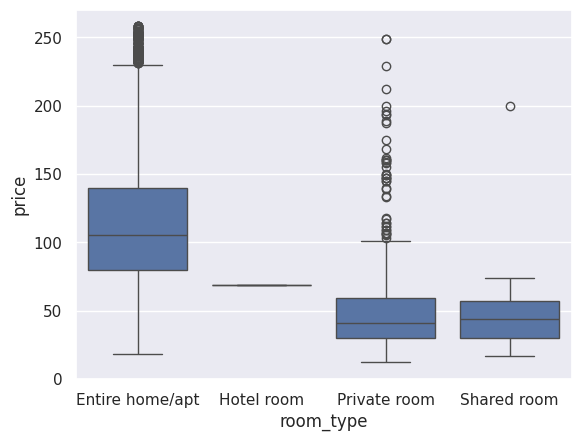

In [ ]:
sns.boxplot(outliers(df, 'price'), x='room_type', y='price')

In [ ]:
df['price'].fillna(df['price'].mean(), inplace=True)

In [ ]:
df.describe(exclude=np.number).T

<ipython-input-357-6328dac4ef37>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=np.number).T
<ipython-input-357-6328dac4ef37>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=np.number).T
<ipython-input-357-6328dac4ef37>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=np.number).T
<ipython-input-357-6328dac4ef37>:1: FutureWarn

,count,unique,top,freq,first,last
listing_url,7783,7783,https://www.airbnb.com/rooms/96033,1,NaT,NaT
last_scraped,7783,1,2023-12-31 00:00:00,7783,2023-12-31,2023-12-31
source,7783,2,city scrape,7623,NaT,NaT
name,7783,3624,Rental unit in Málaga · 1 bedroom · 1 bed · 1 bath,164,NaT,NaT
picture_url,7783,7696,https://a0.muscache.com/pictures/miso/Hosting-999102754901788562/original/513ee443-bf54-45bc-851...,11,NaT,NaT
host_url,7783,2973,https://www.airbnb.com/users/show/80225433,181,NaT,NaT
host_name,7783,1463,I Loft Malaga,181,NaT,NaT
host_since,7783,2026,2016-06-27,182,NaT,NaT
host_location,7783,174,"Málaga, Spain",3861,NaT,NaT
host_response_time,7158,4,within an hour,6258,NaT,NaT


# 4. Study of the relationship between variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7783 entries, 96033 to 1057114997047818035
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   7783 non-null   object        
 1   last_scraped                                  7783 non-null   datetime64[ns]
 2   source                                        7783 non-null   object        
 3   name                                          7783 non-null   object        
 4   picture_url                                   7783 non-null   object        
 5   host_id                                       7783 non-null   int64         
 6   host_url                                      7783 non-null   object        
 7   host_name                                     7783 non-null   object        
 8   host_since                                    778

<Axes: >

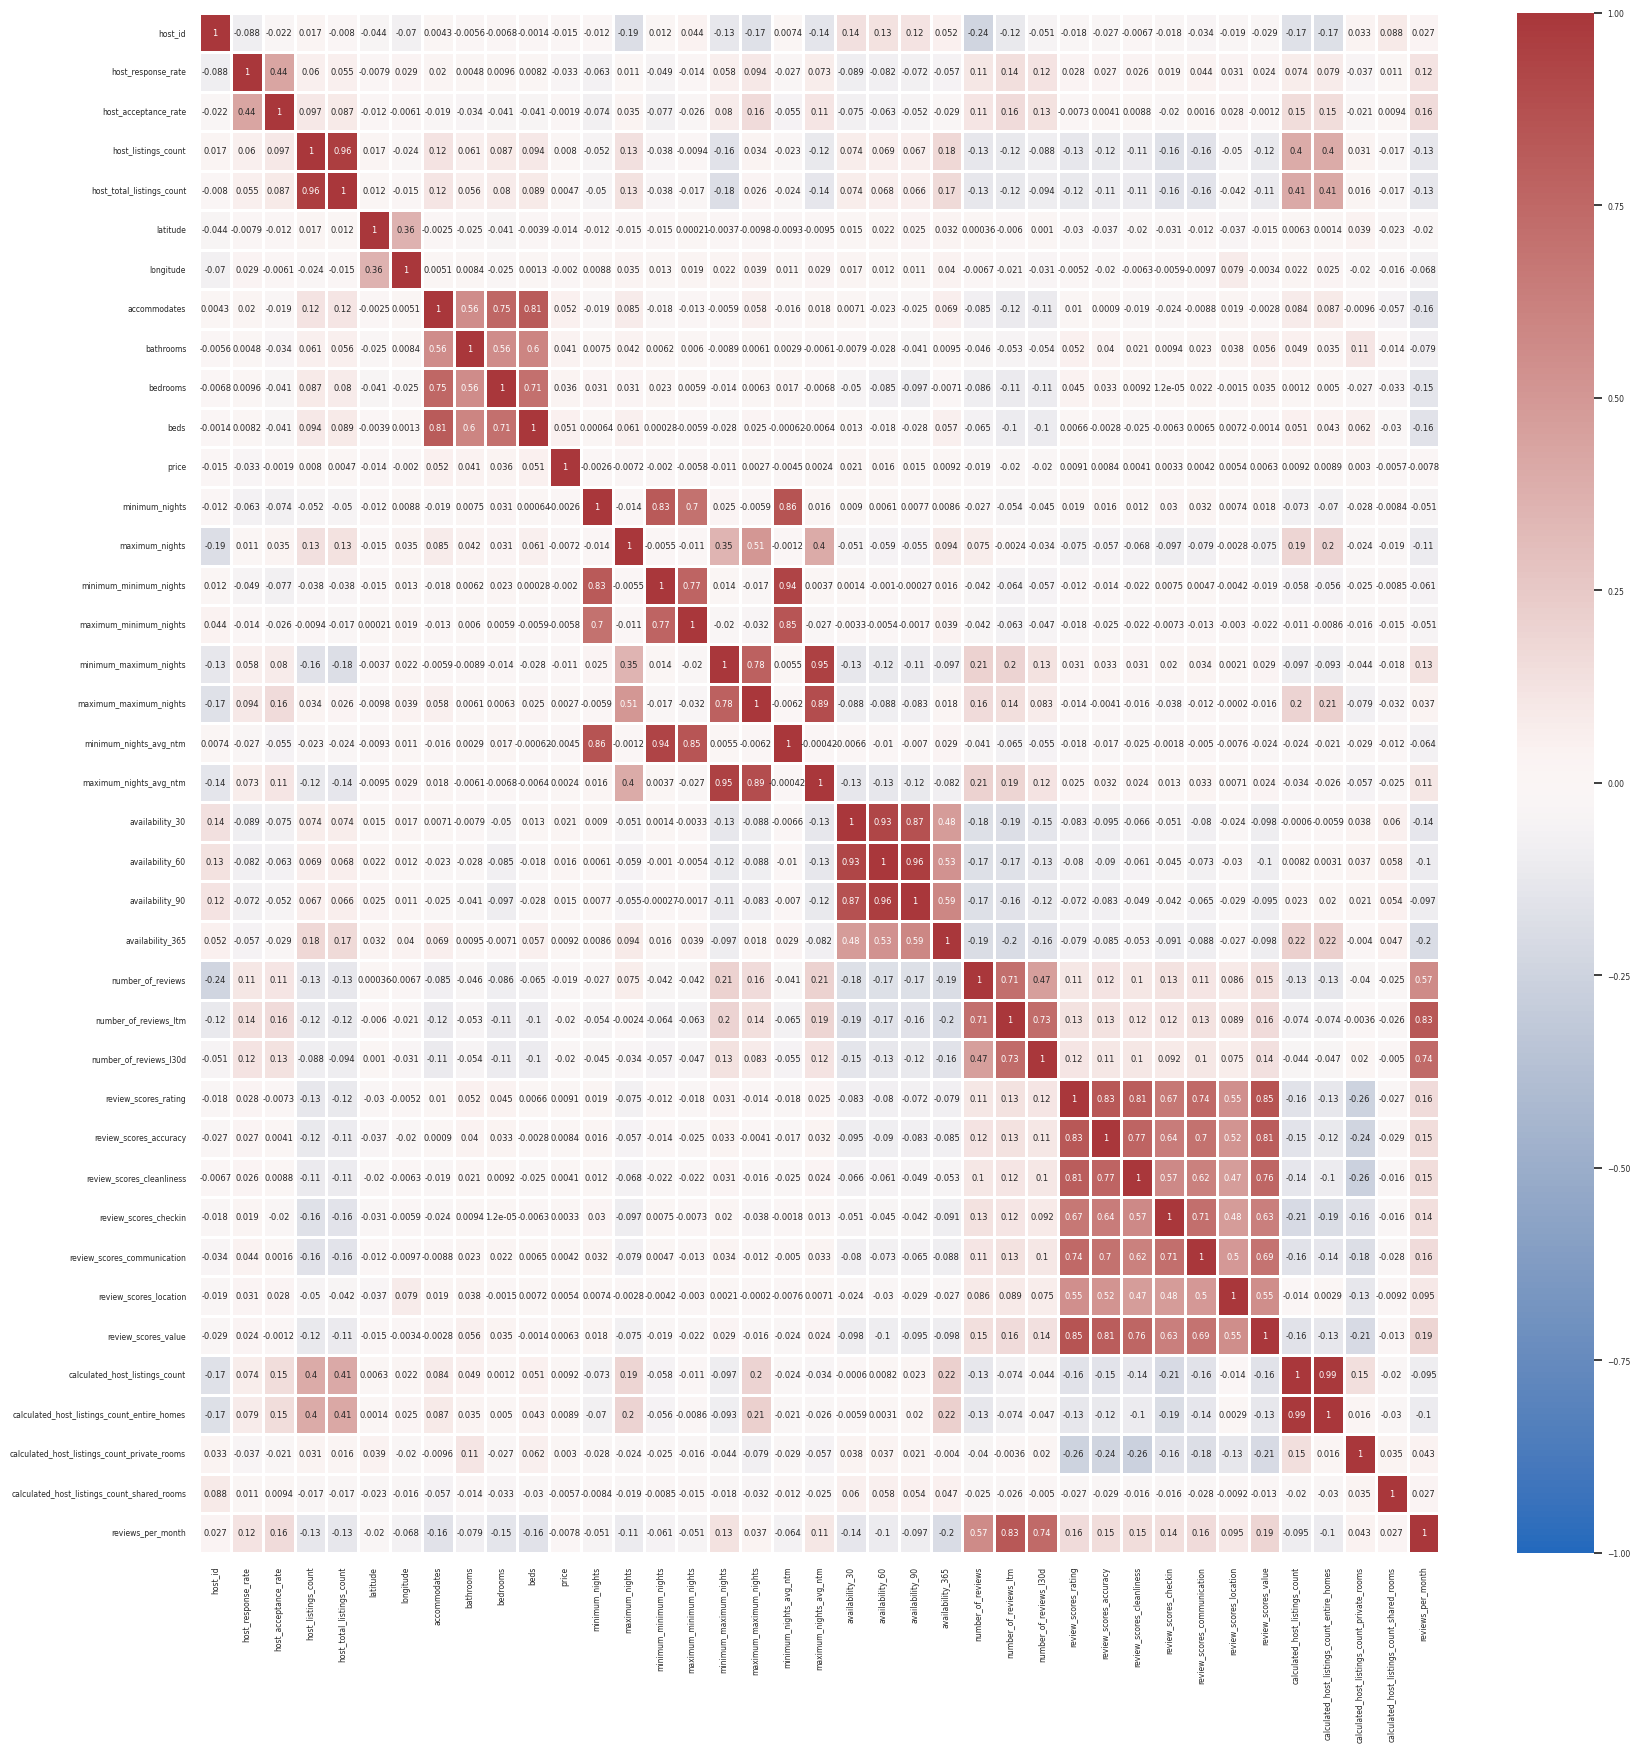

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr = df.select_dtypes(include=numerics).corr(method='pearson', min_periods=1, numeric_only=True)
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.5)
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1)
#macierz pearsona

<Axes: >

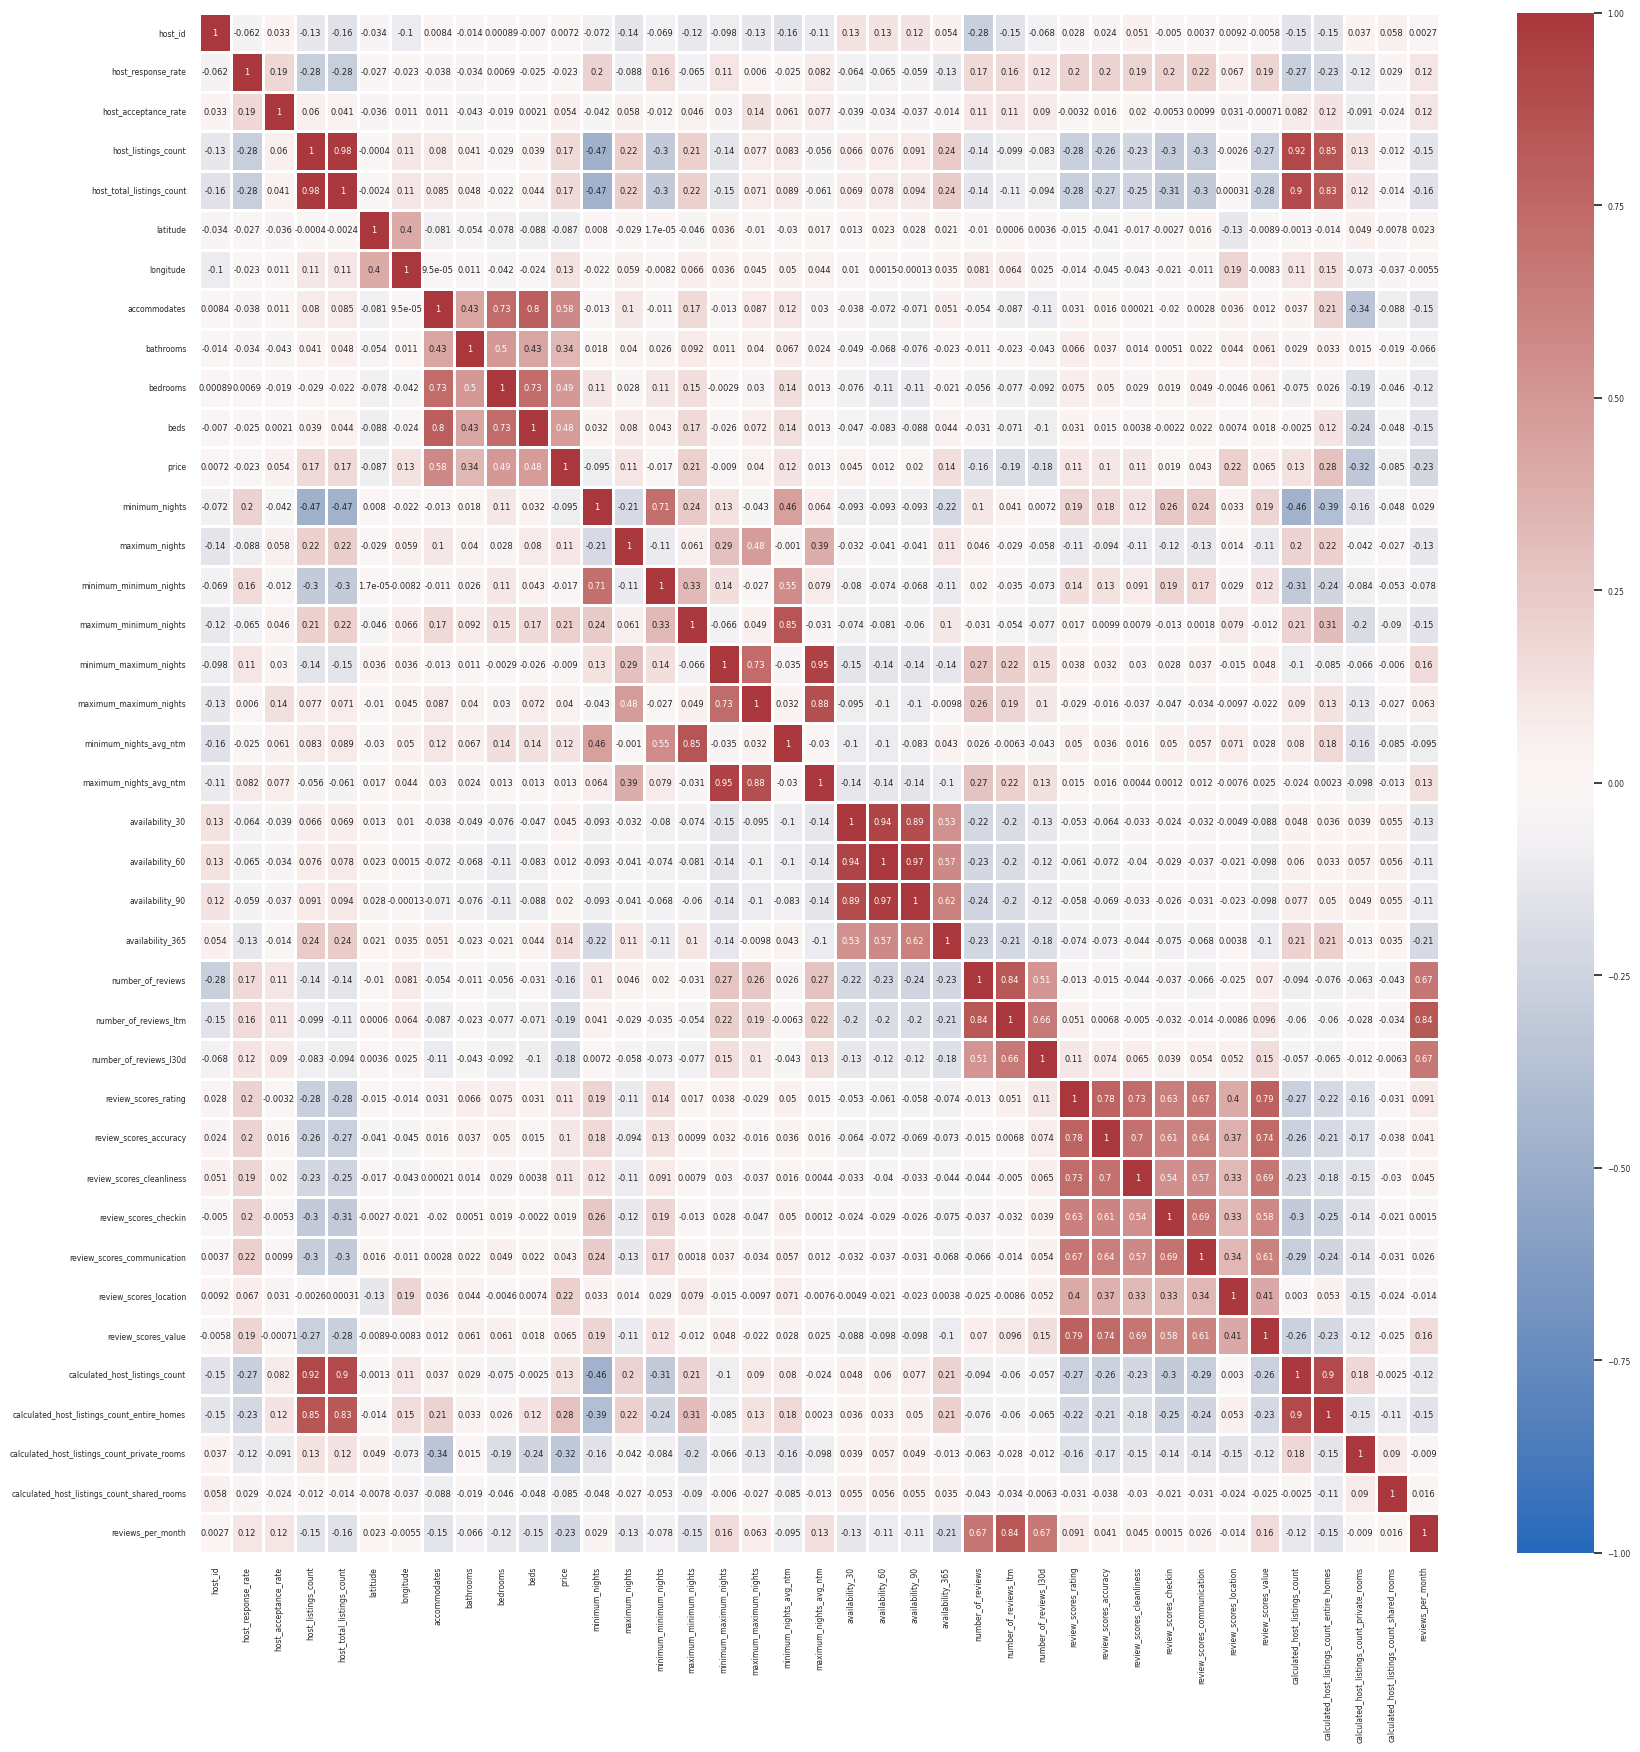

In [ ]:
corr = df.select_dtypes(include=numerics).corr(method='spearman', min_periods=1, numeric_only=True)
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.5)
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1)

<Axes: >

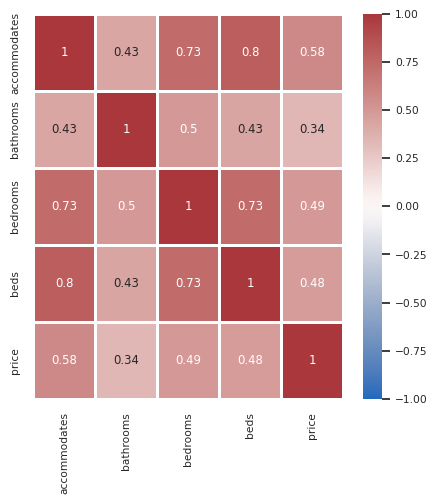

In [ ]:
data_character = df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']]

corr = df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']].corr(method='spearman', min_periods=1, numeric_only=True)
plt.figure(figsize=(5, 5))
sns.set(font_scale=0.7)
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1)

<Axes: >

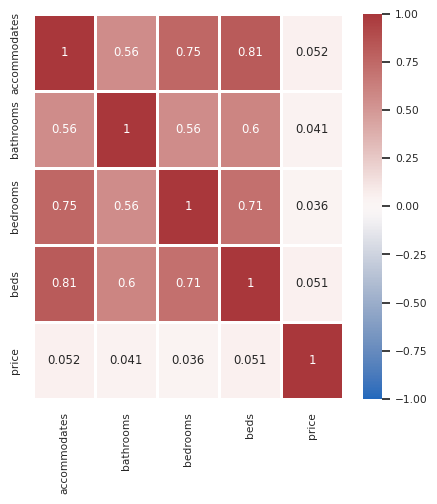

In [ ]:
corr = data_character.corr(method='pearson', min_periods=1, numeric_only=True)
plt.figure(figsize=(5, 5))
sns.set(font_scale=0.7)
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1)

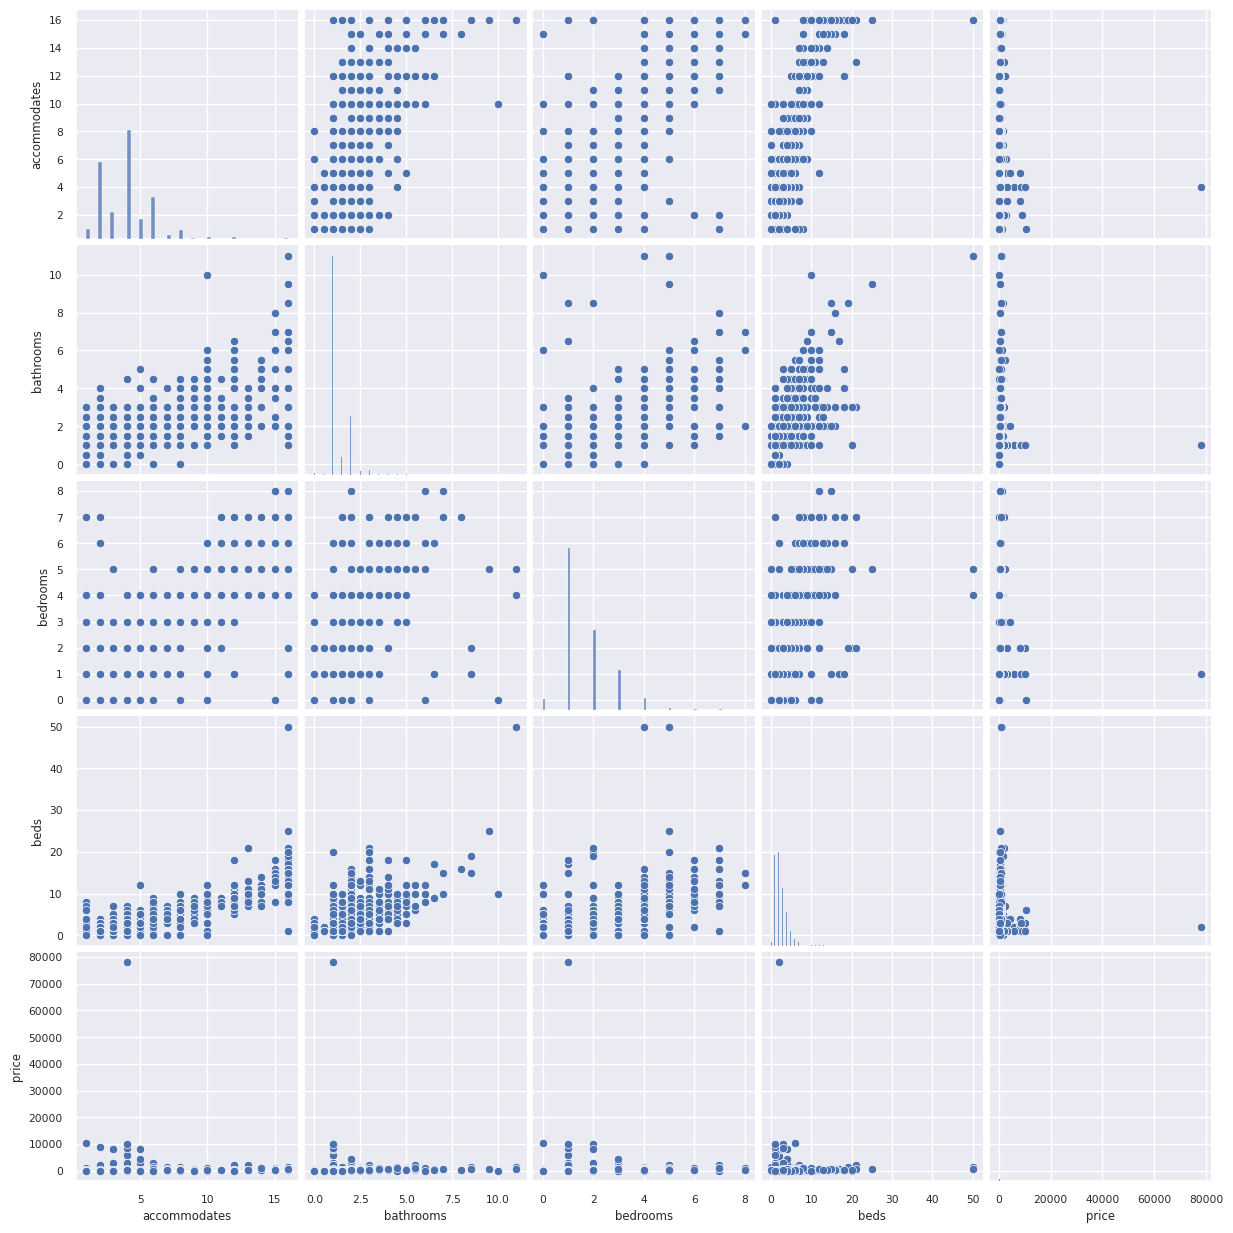

In [ ]:
sns.pairplot(data_character)

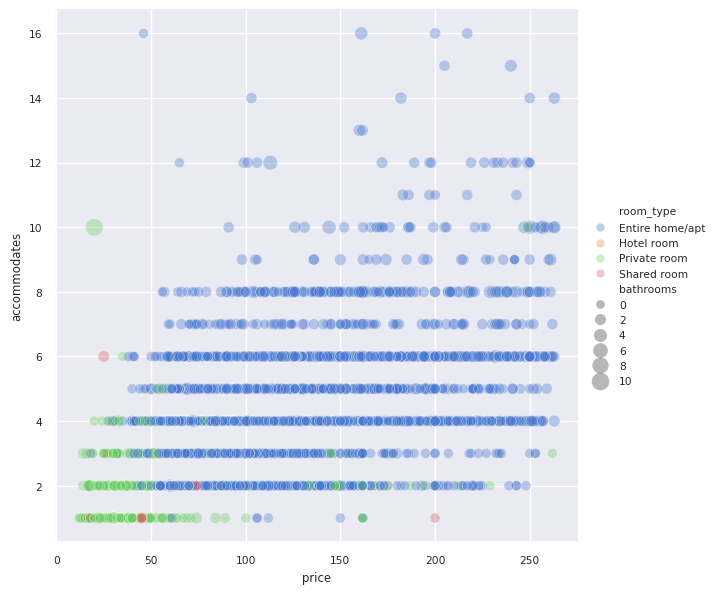

In [ ]:
sns.relplot(x="price", y="accommodates", hue="room_type", size='bathrooms',
            alpha=0.35, palette="muted", sizes=(40,160),
            height=6, data=outliers(df, 'price'))
#z wykresu widać, że prywatne pokoje charakteryzują się mniejszą ceną za wynajem niż całe apartamenty
#w cenie powyżej 150 za noc jest wiecej pokoi 2 osobowych niz 3 osobowych

In [ ]:
data_short = df[['room_type', 'neighbourhood_cleansed', 'price']]
data_short.head()

,room_type,neighbourhood_cleansed,price
id,,,
96033,Entire home/apt,Este,53.0
166473,Private room,Este,19.0
212845,Shared room,Este,43.0
330760,Private room,Centro,44.0
340024,Entire home/apt,Centro,61.0


<Axes: ylabel='Frequency'>

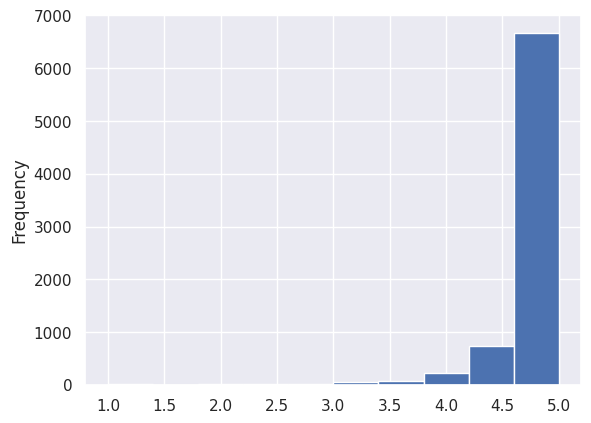

In [ ]:
df['review_scores_communication'].plot(kind='hist')
#większość ocen mieści się w przedziale (4.5 - 5)

<Axes: xlabel='review_scores_communication', ylabel='review_scores_checkin'>

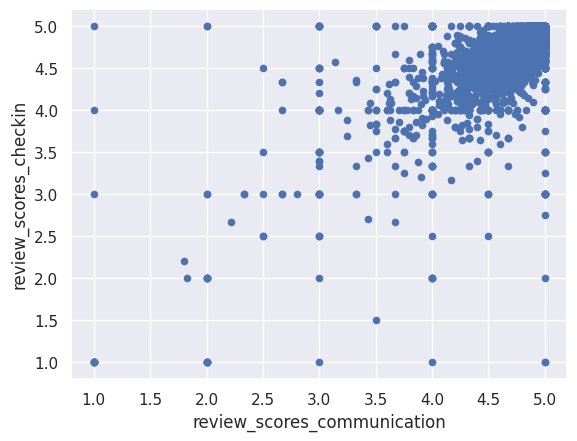

In [ ]:
df.plot(kind='scatter', x='review_scores_communication', y='review_scores_checkin')

<Axes: >

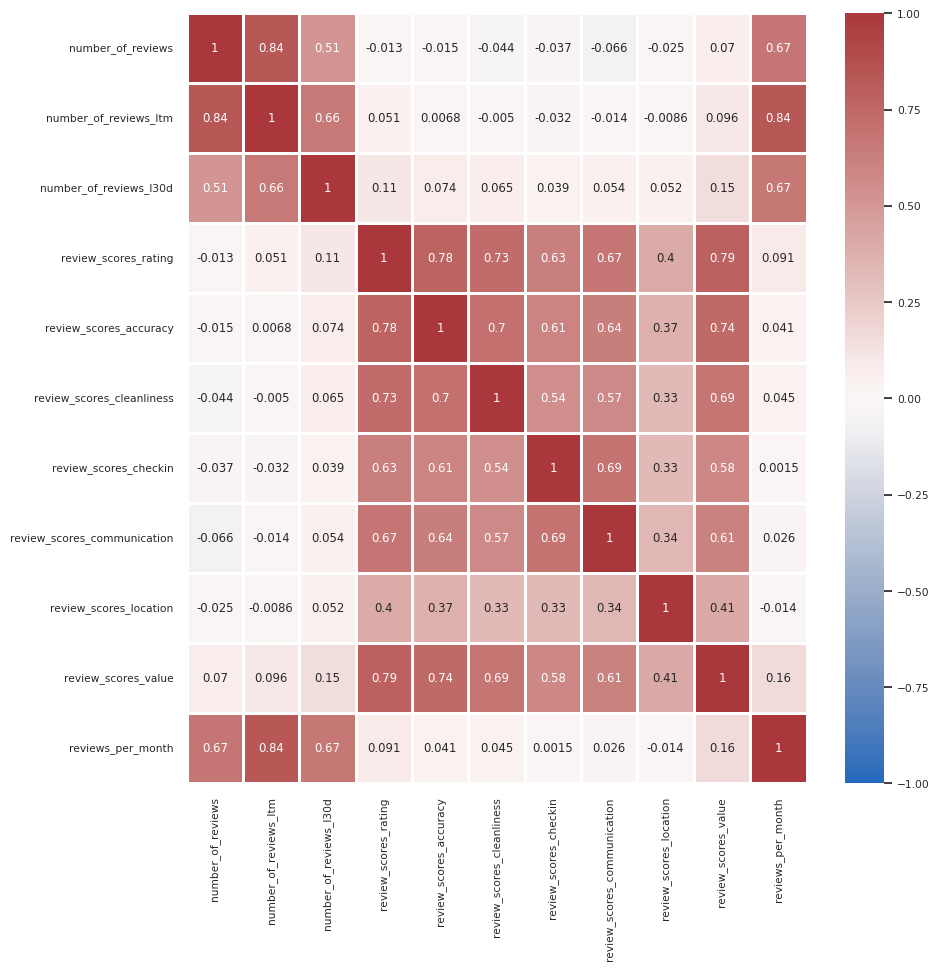

In [ ]:
data_review = df[[
'number_of_reviews',
'number_of_reviews_ltm',
'number_of_reviews_l30d',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'reviews_per_month'
]]

corr = data_review.corr(method='spearman', min_periods=1, numeric_only=True)
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.7)
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1, linewidths=1)

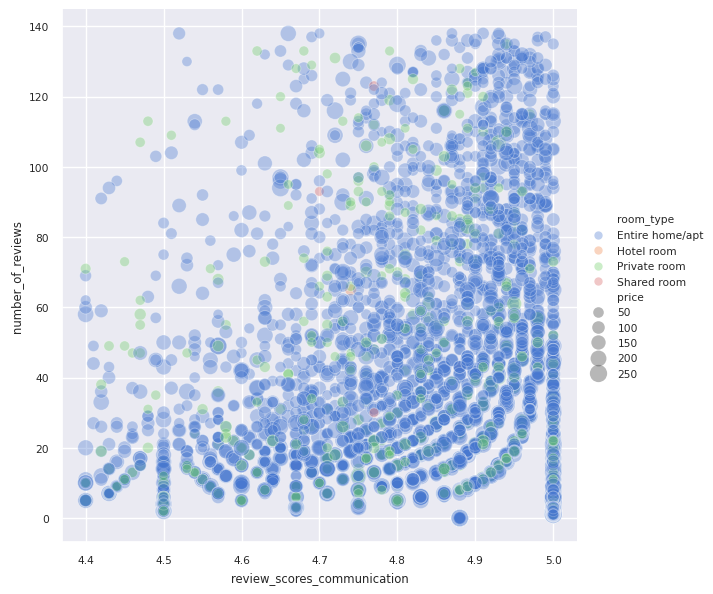

In [ ]:
sns.relplot(x='review_scores_communication', y='number_of_reviews', hue="room_type", size='price',
            alpha=0.35, palette="muted", sizes=(40,160),
            height=6, data=outliers(outliers(outliers(df, 'review_scores_communication'), 'price'), 'number_of_reviews'))
#miejsca z wyzsza oceną komuniacji hosta mają wiecej opinii

<Axes: xlabel='review_scores_communication', ylabel='number_of_reviews'>

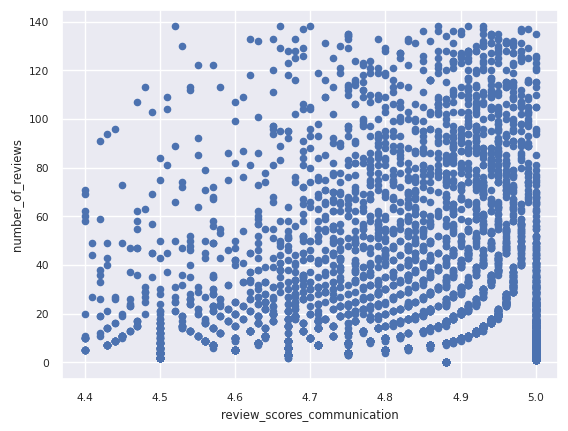

In [ ]:
outliers(outliers(outliers(df, 'review_scores_communication'), 'price'), 'number_of_reviews').plot(kind='scatter', x='review_scores_communication', y='number_of_reviews')

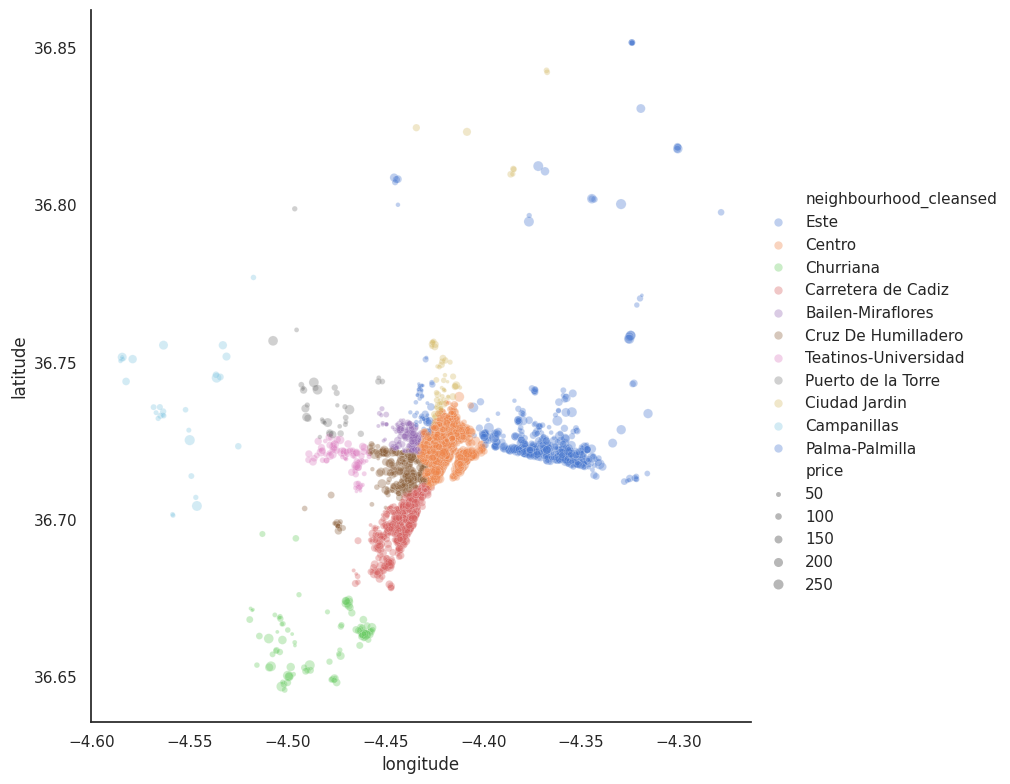

In [ ]:
sns.set_theme(style="white")
sns.relplot(x="longitude", y="latitude", hue="neighbourhood_cleansed", size='price',
            alpha=0.35, palette="muted", sizes=(5,55),
            height=8, data=outliers(df, 'price'))

<Axes: xlabel='price', ylabel='neighbourhood_cleansed'>

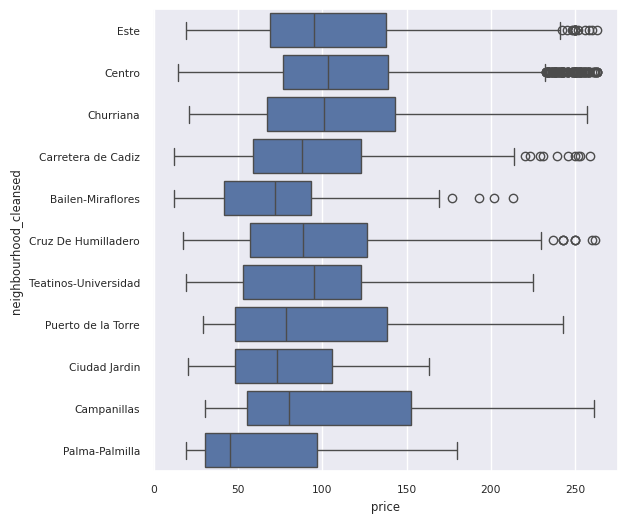

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(outliers(df, 'price'), x='price', y='neighbourhood_cleansed')

In [ ]:
#places with higher host communion ratings have more reviews